In [1]:

import pandas as pd

# Load the two files into DataFrames
df1 = pd.read_csv('hour.csv')
df2 = pd.read_csv('day.csv')

# Drop rows with null values in both DataFrames
df1_clean = df1.dropna()
df2_clean = df2.dropna()

# Alternatively, you can also use the `fillna` method to replace null values with a specific value
# df1_clean = df1.fillna('Unknown')
# df2_clean = df2.fillna('Unknown')

# Print the cleaned DataFrames
print(df1_clean)
print(df2_clean)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

In [2]:

import pandas as pd

# Load the two files into DataFrames
df1 = pd.read_csv('hour.csv')
df2 = pd.read_csv('day.csv')

# Drop rows with null values in both DataFrames
df1_clean = df1.dropna()
df2_clean = df2.dropna()

# Save the cleaned DataFrames to new CSV files
df1_clean.to_csv('hour_clean.csv', index=False)
df2_clean.to_csv('day_clean.csv', index=False)

print("Cleaned files saved to file1_clean.csv and file2_clean.csv")

Cleaned files saved to file1_clean.csv and file2_clean.csv


   instant     dteday  season_hour  yr_hour  mnth_hour  hr  holiday_hour  \
0        1 2011-01-01            1        0          1   0             0   

   weekday_hour  workingday_hour  weathersit_hour  ...  weekday_day  \
0             6                0                1  ...            6   

   workingday_day  weathersit_day  temp_day  atemp_day   hum_day  \
0               0               2  0.344167   0.363625  0.805833   

   windspeed_day  casual_day  registered_day  cnt_day  
0       0.160446         331             654      985  

[1 rows x 31 columns]


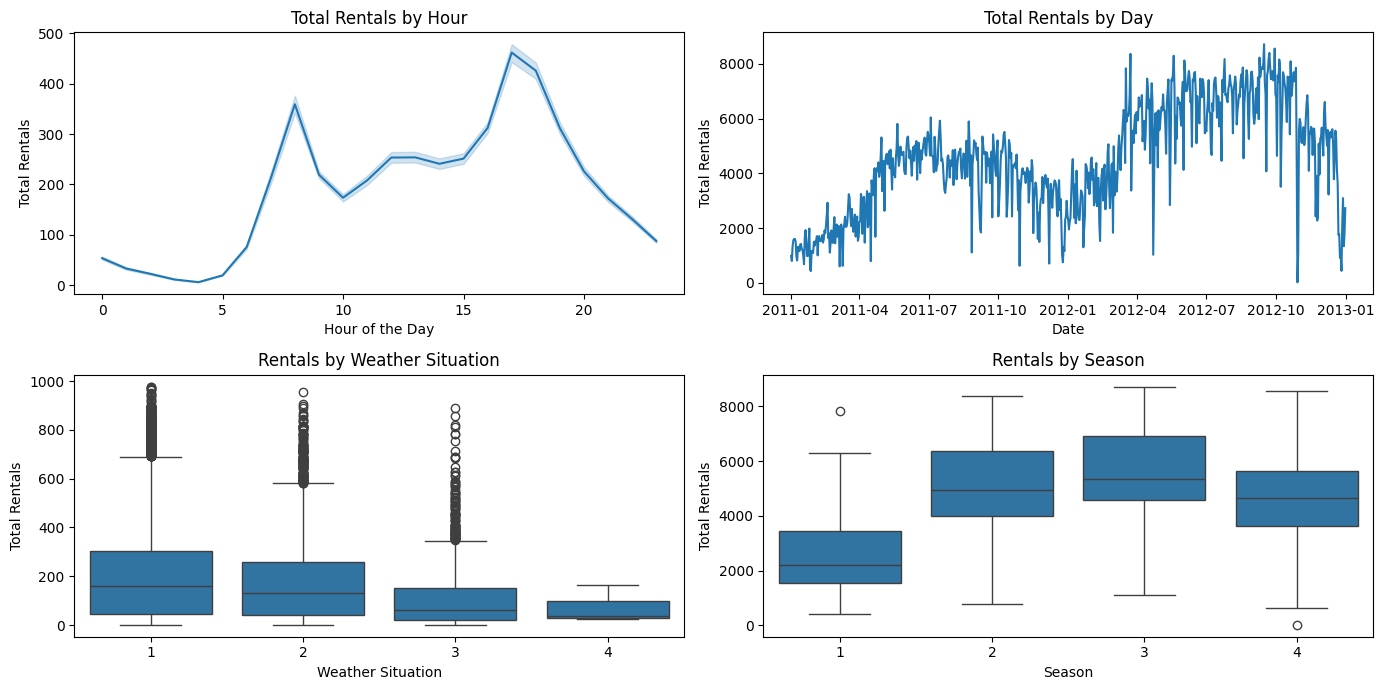

done


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
hour_df = pd.read_csv('hour.csv')
day_df = pd.read_csv('day.csv')

# Convert date columns to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Define relationships between tables
# Merge hour_df and day_df on 'dteday' and 'instant'
merged_df = pd.merge(hour_df, day_df, on=['dteday', 'instant'], suffixes=('_hour', '_day'))

# Display the head of the merged dataframe
print(merged_df.head())

# Plotting
plt.figure(figsize=(14, 7))

# Total rentals by hour
plt.subplot(2, 2, 1)
sns.lineplot(data=hour_df, x='hr', y='cnt')
plt.title('Total Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')

# Total rentals by day
plt.subplot(2, 2, 2)
sns.lineplot(data=day_df, x='dteday', y='cnt')
plt.title('Total Rentals by Day')
plt.xlabel('Date')
plt.ylabel('Total Rentals')

# Rentals by weather situation
plt.subplot(2, 2, 3)
sns.boxplot(data=hour_df, x='weathersit', y='cnt')
plt.title('Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')

# Rentals by season
plt.subplot(2, 2, 4)
sns.boxplot(data=day_df, x='season', y='cnt')
plt.title('Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')

plt.tight_layout()
plt.show()

print("done")

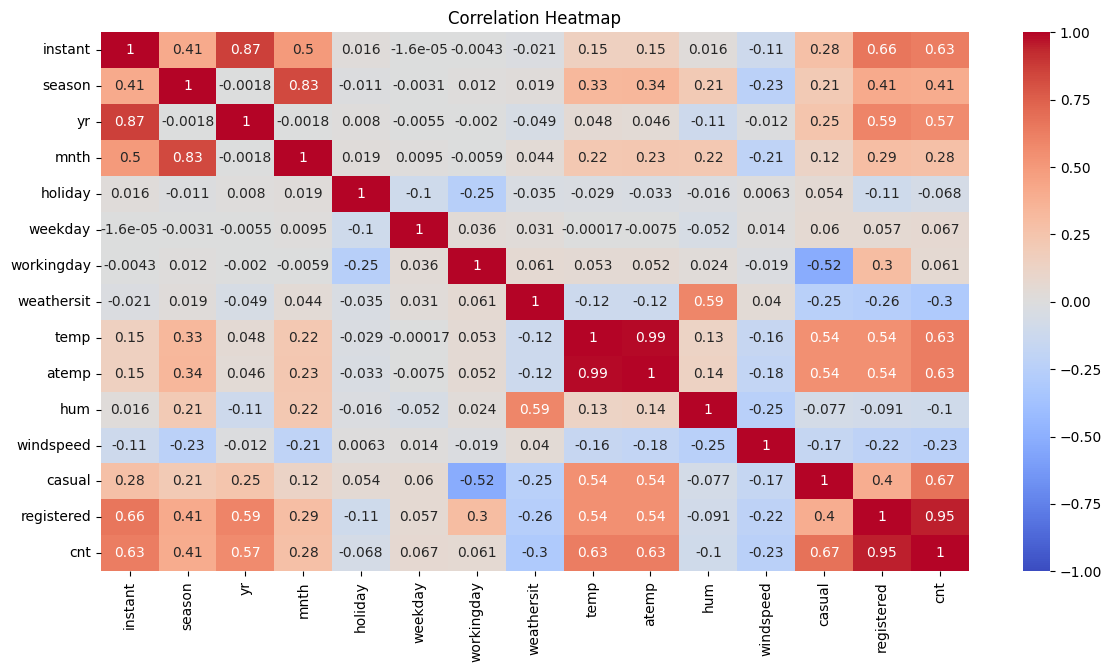

Correlation heatmap generated successfully.


In [4]:
# Clean the dataset by removing non-numeric columns before generating the correlation heatmap

# Drop non-numeric columns
numeric_day_df = day_df.drop(columns=['dteday'])

# Generate the correlation heatmap again
plt.figure(figsize=(14, 7))
corr = numeric_day_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

print('Correlation heatmap generated successfully.')